In [ ]:
#Data Preprocessing includes
'''
1)Handling missing values
2)Scaling and normalization
3)Parsing dates
4)Character encodings
5)Inconsistent Data Entry'''

In [1]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read data
earthquakes = pd.read_csv("database.csv")

# set seed for reproducibility
np.random.seed(0)

In [2]:
# print the first 5 rows of the data
earthquakes.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01-02-1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01-04-1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01-05-1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01-08-1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01-09-1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [ ]:
#The data contains Missing values 
'''HANDLING MISSING VALUES'''

In [3]:
#The profile of the missing values
missing_values = earthquakes.isnull().sum()
print("MISSING VALUES")
print(missing_values)

MISSING VALUES
Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64


In [4]:
#Droping rows and columns that contain NaN values
earthquakes.dropna(axis=0, inplace=True)
earthquakes.dropna(axis=1, inplace=True)
earthquakes.sample(10)  

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3673,10/28/1975,14:30:00,37.290167,-116.411500,Nuclear Explosion,1.30,31.61,19.0,5.67,ML,...,8.0,260.0,1.472000,99.000,2.75,CI3006257,CI,CI,CI,Reviewed
3307,11/22/1974,16:25:34,30.250000,-114.800000,Earthquake,6.00,31.61,20.0,5.55,ML,...,4.0,312.0,2.641000,99.000,3.22,CI3319062,CI,CI,CI,Reviewed
1532,03/26/1970,19:00:01,37.300500,-116.534167,Nuclear Explosion,1.20,31.61,16.0,5.54,ML,...,10.0,260.0,1.377000,99.000,0.35,CI3325031,CI,CI,CI,Reviewed
5631,09-07-1980,04:36:38,38.138333,-118.391333,Earthquake,6.00,31.61,5.0,5.52,ML,...,12.0,333.0,1.090000,8.020,0.33,CI9735242,CI,CI,CI,Reviewed
1129,12/19/1968,16:30:01,37.231500,-116.473667,Nuclear Explosion,1.40,31.61,16.0,5.52,ML,...,6.0,257.0,1.415000,99.000,1.36,CI3342181,CI,CI,CI,Reviewed
22238,05/28/2014,21:15:07,18.045000,-68.350900,Earthquake,90.00,2.00,31.0,5.80,ML,...,12.0,262.8,0.467124,2.900,0.41,PR14148004,PR,PR,PR,Reviewed
3754,01-03-1976,19:15:01,37.296500,-116.333167,Nuclear Explosion,1.50,31.61,20.0,5.84,ML,...,8.0,261.0,1.534000,99.000,0.44,CI3001652,CI,CI,CI,Reviewed
897,04/26/1968,15:00:02,37.295333,-116.455667,Nuclear Explosion,1.20,31.61,17.0,5.63,ML,...,6.0,261.0,1.438000,99.000,1.03,CI3342128,CI,CI,CI,Reviewed
3516,06/26/1975,12:30:01,37.278833,-116.368667,Nuclear Explosion,6.00,31.61,19.0,5.52,ML,...,13.0,260.0,1.504000,99.000,3.44,CI12328563,CI,CI,CI,Reviewed
5523,05/18/1980,15:32:11,46.207333,-122.188000,Earthquake,1.51,0.56,18.0,5.70,MD,...,1.0,62.0,0.008296,0.682,0.22,UW10084803,UW,UW,UW,Reviewed


In [ ]:
#The data column is not parsed
'''PARSING DATES'''

In [5]:
# print the first few rows of the date column
print(earthquakes['Date'].head())

565     12/20/1966
897     04/26/1968
1129    12/19/1968
1380    09/16/1969
1532    03/26/1970
Name: Date, dtype: object


In [6]:
#Notice the difference in how the dtype is shown in below two cases
print(earthquakes['Date'].dtype)
print()
earthquakes['Date'].dtype

object



dtype('O')

In [7]:
# using infer_datetime_format as the explicit format failed due to data not in consistent form
earthquakes['Parsed-Date'] = pd.to_datetime(earthquakes['Date'], infer_datetime_format=True)

In [8]:
# Check the date in new column : Parsed-Date
earthquakes['Parsed-Date'].head()

565    1966-12-20
897    1968-04-26
1129   1968-12-19
1380   1969-09-16
1532   1970-03-26
Name: Parsed-Date, dtype: datetime64[ns]

In [9]:
# print sample data for Parsed-Date
earthquakes['Parsed-Date'].sample(10)

2723    1973-06-06
1129    1968-12-19
1380    1969-09-16
1532    1970-03-26
5631    1980-09-07
565     1966-12-20
3754    1976-01-03
22238   2014-05-28
3516    1975-06-26
3307    1974-11-22
Name: Parsed-Date, dtype: datetime64[ns]

In [10]:
pip install pytz

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import pytz

# Assuming datetimes are originally in UTC
utc = pytz.UTC

# Convert the 'Parsed-Date' column to datetime format
earthquakes['Parsed-Date'] = pd.to_datetime(earthquakes['Parsed-Date'])

# Make sure the datetime column is timezone-aware (UTC)
earthquakes['Parsed-Date'] = earthquakes['Parsed-Date'].apply(lambda x: x if x.tzinfo else utc.localize(x))

# Now, use the .dt accessor to extract date components
day_of_month_earthquakes = earthquakes['Parsed-Date'].dt.day
month_of_earthquakes = earthquakes['Parsed-Date'].dt.month
year_of_earthquakes = earthquakes['Parsed-Date'].dt.year

C:\Users\Swetha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Parsed-Date', ylabel='Density'>

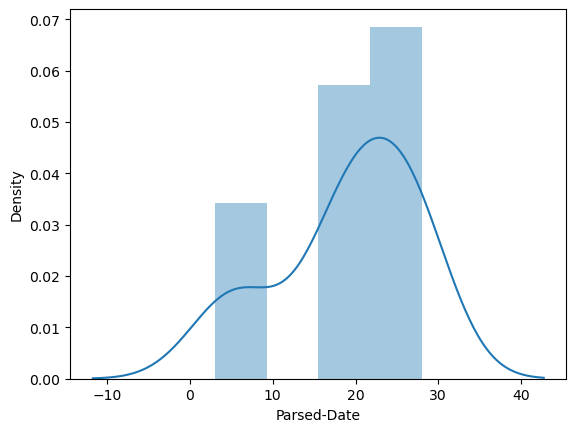

In [12]:
#data visualization 
day_of_month_earthquakes = earthquakes['Parsed-Date'].dt.day

day_of_month_earthquakes = day_of_month_earthquakes.dropna()

sns.distplot(day_of_month_earthquakes)

In [ ]:
#Hence the loading and Preprocessing of the dataset has been completed.